In [1]:
# Paso 1: Análisis exploratorio de datos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar datos
data = pd.read_csv('C:/Users/SAMSUNG/Downloads/SEMESTRE OCTAVO/ANALISIS DE DATOS/TAREA 3/winequality-red.csv')

In [3]:
# Resumen de estadísticas descriptivas
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

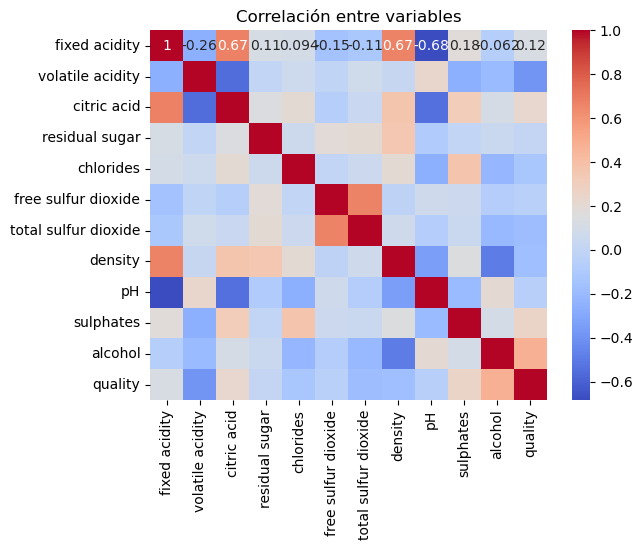

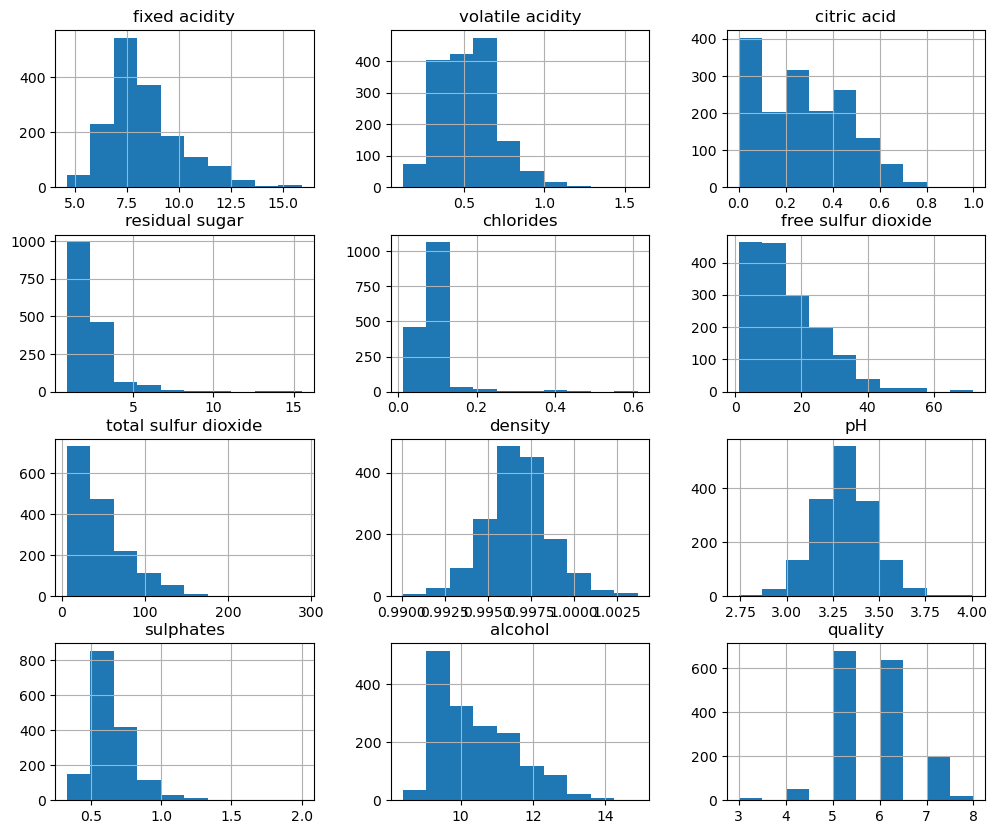

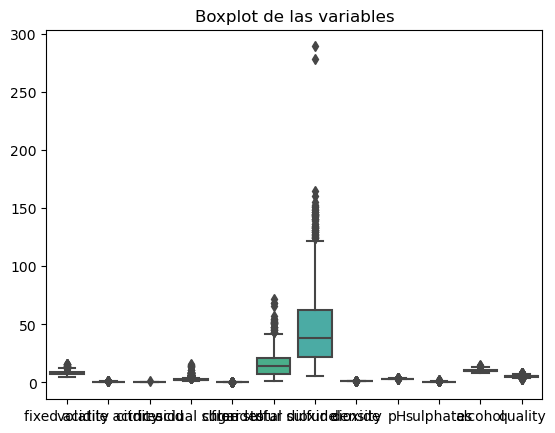

In [4]:
# Correlación entre variables
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()
# Histogramas de las variables
data.hist(figsize=(12, 10))
plt.show()

# Boxplot para detectar valores atípicos
sns.boxplot(data=data)
plt.title('Boxplot de las variables')
plt.show()

In [5]:
# Paso 2: Preprocesamiento de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Manejo de valores faltantes
imputer = SimpleImputer(strategy='mean')
data_clean = imputer.fit_transform(data)

# Escalado de características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [6]:
# Paso 3: Selección de características
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las características más relevantes
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(data_scaled, data['quality'])

In [7]:
# Paso 4: División del dataset en Train y Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, data['quality'], test_size=0.2, random_state=42)

In [8]:
# Paso 5: Entrenamiento del modelo
from sklearn.tree import DecisionTreeClassifier

# Entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Paso 6: Evaluación del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones en el conjunto de test
y_pred = clf.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.60625
Precision: 0.5954547590567327
Recall: 0.60625
F1 Score: 0.6007533201388648


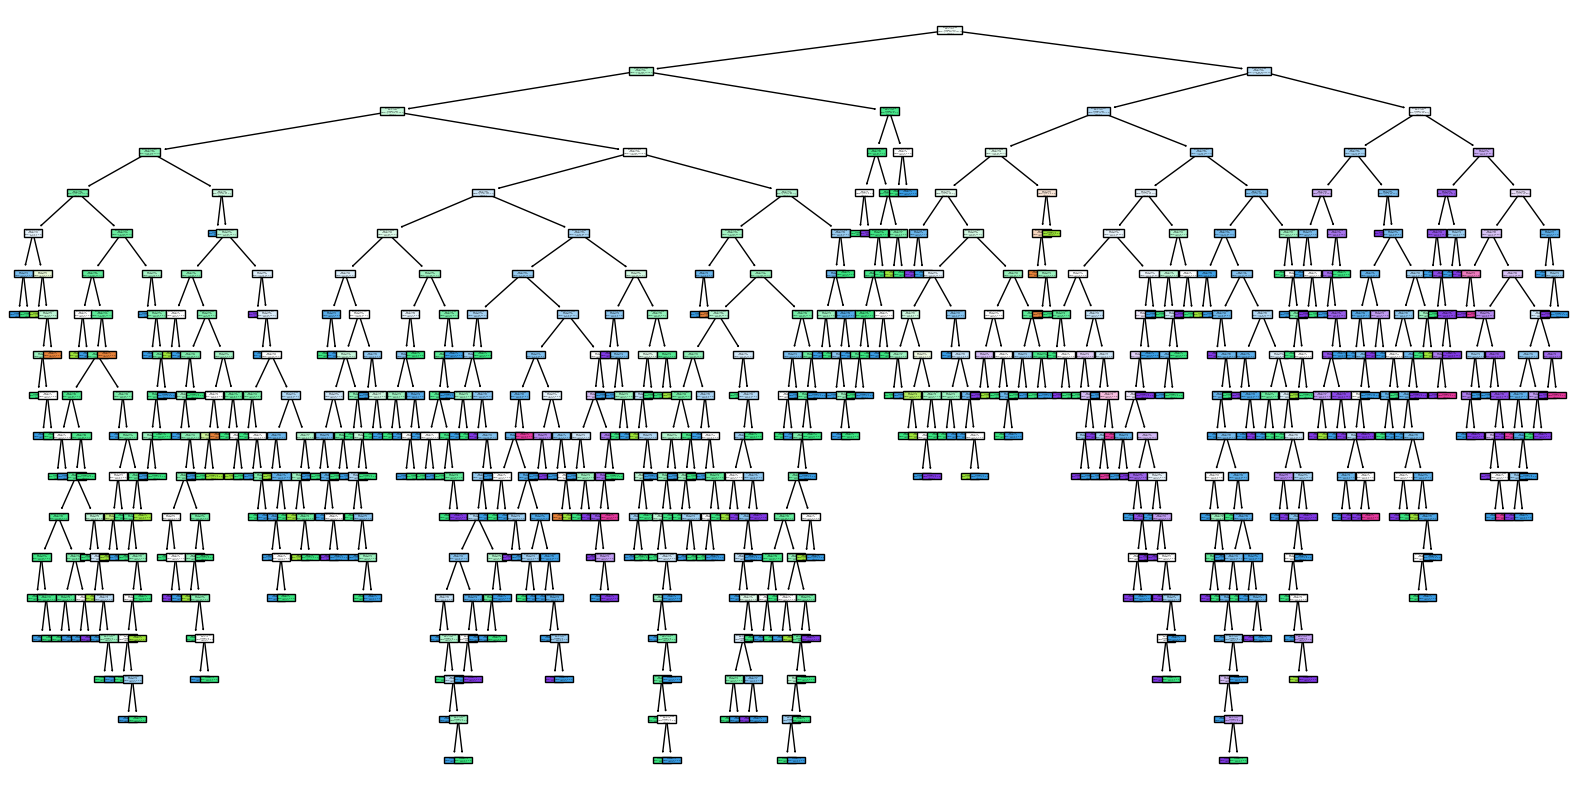

In [10]:
# Paso 7: Visualización de resultados
from sklearn.tree import plot_tree

# Visualización del árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'], class_names=[str(i) for i in range(11)])
plt.show()